# Disease Prediction

## Importing libraries

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score,accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report 

# import tensorflow and keras
import tensorflow as tf
from tensorflow.keras.models import Sequential  
from tensorflow.keras import layers   
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading Datasets

In [51]:
train_set = pd.read_csv('../input/disease-prediction-using-machine-learning/Training.csv')
test_set = pd.read_csv('../input/disease-prediction-using-machine-learning/Testing.csv')
train_set = train_set.iloc[:,:-1]
train_set.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


### Shape of training set

In [52]:
nRow,nCol=train_set.shape
print(f'**Summary**:\n There are {nRow} rows and {nCol} columns. Prognosis is the target/label variable.')

**Summary**:
 There are 4920 rows and 133 columns. Prognosis is the target/label variable.


## Columns

In [53]:
test_set.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

### Output Variable: Prognosis

In [54]:
train_set['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

## Data Pre-processing

### Checking Missing data points

In [55]:
# Get the number of missing data points, NA's ,NAN's values per column
total = train_set.isnull().sum().sort_values(ascending=False)
percent = (train_set.isnull().sum()/train_set.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

total = train_set.isna().sum().sort_values(ascending=False)
percent = (train_set.isna().sum()/train_set.isna().count()).sort_values(ascending=False)
na_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

if((na_data.all()).all()>0 or (na_data.all()).all()>0):
     print('Found Missing Data or NA values')
        
else:
    print('There is no missing data or null values in the collected data. Additionally, the length of each column is same.')

There is no missing data or null values in the collected data. Additionally, the length of each column is same.


## EDA

<AxesSubplot:title={'center':'Top 10 most common symptoms'}, xlabel='Symtoms', ylabel='Number of diseases'>

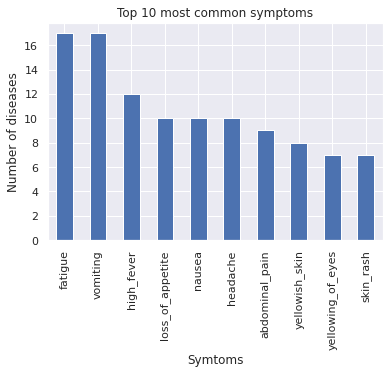

In [56]:
(train_set.groupby('prognosis').sum()>0).sum().sort_values(ascending=False).head(10).plot(kind='bar',title='Top 10 most common symptoms',xlabel="Symtoms",ylabel="Number of diseases")

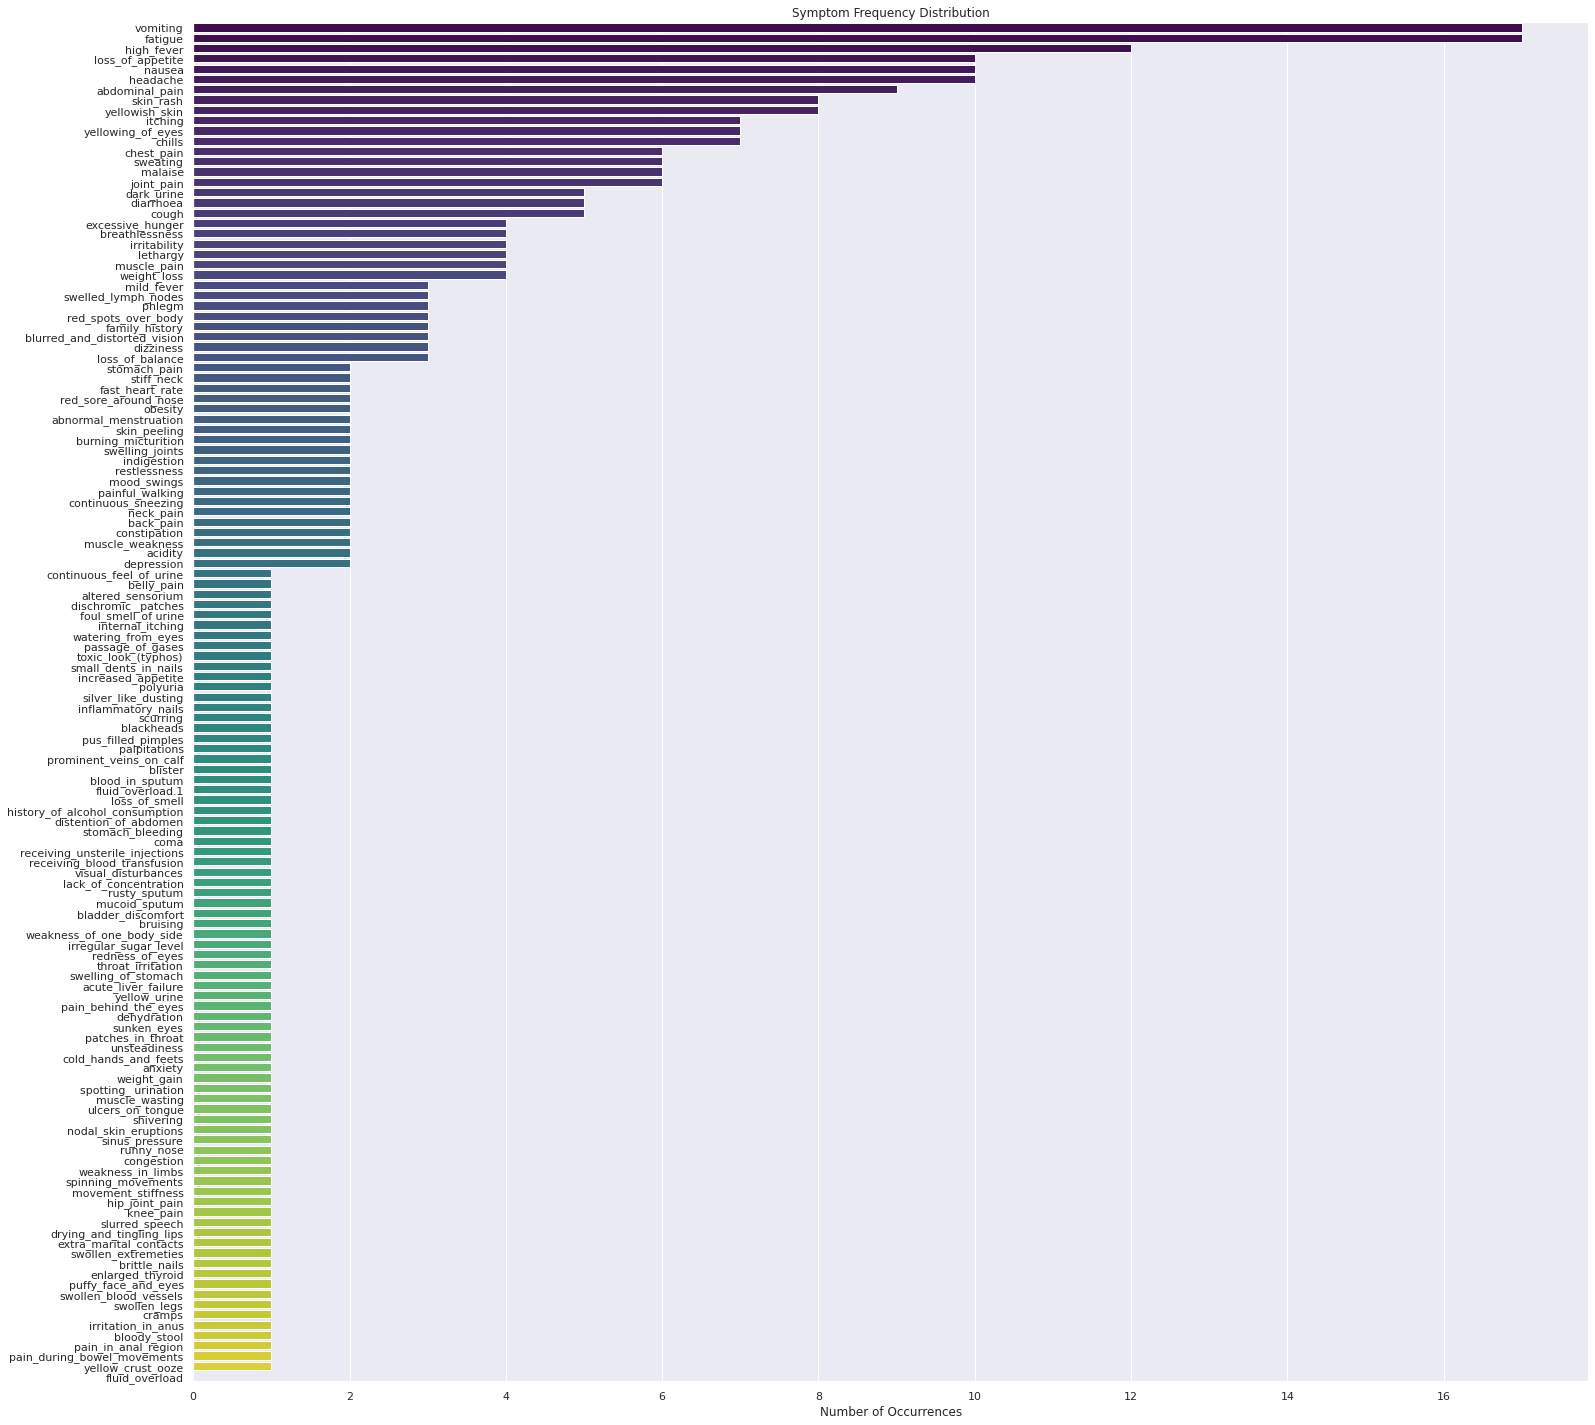

In [69]:
plt.figure(figsize=(25, 25)) 
sns.barplot(x=symptom_freq.values, y=symptom_freq.index, palette='viridis')
plt.title('Symptom Frequency Distribution')
plt.xlabel('Number of Occurrences')
plt.show()


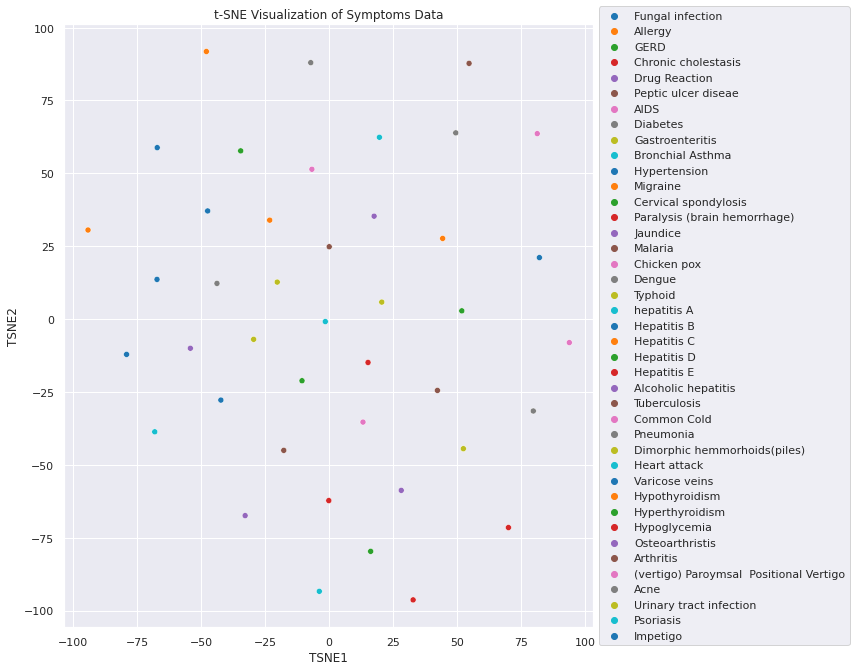

In [68]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(test_set[symptom_cols])
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['prognosis'] = test_set['prognosis']
plt.figure(figsize=(12, 10))
scatter_plot = sns.scatterplot(x='TSNE1', y='TSNE2', hue='prognosis', data=tsne_df, palette='tab10')
scatter_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('t-SNE Visualization of Symptoms Data')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.tight_layout()
plt.show()


### Correlation Matrix

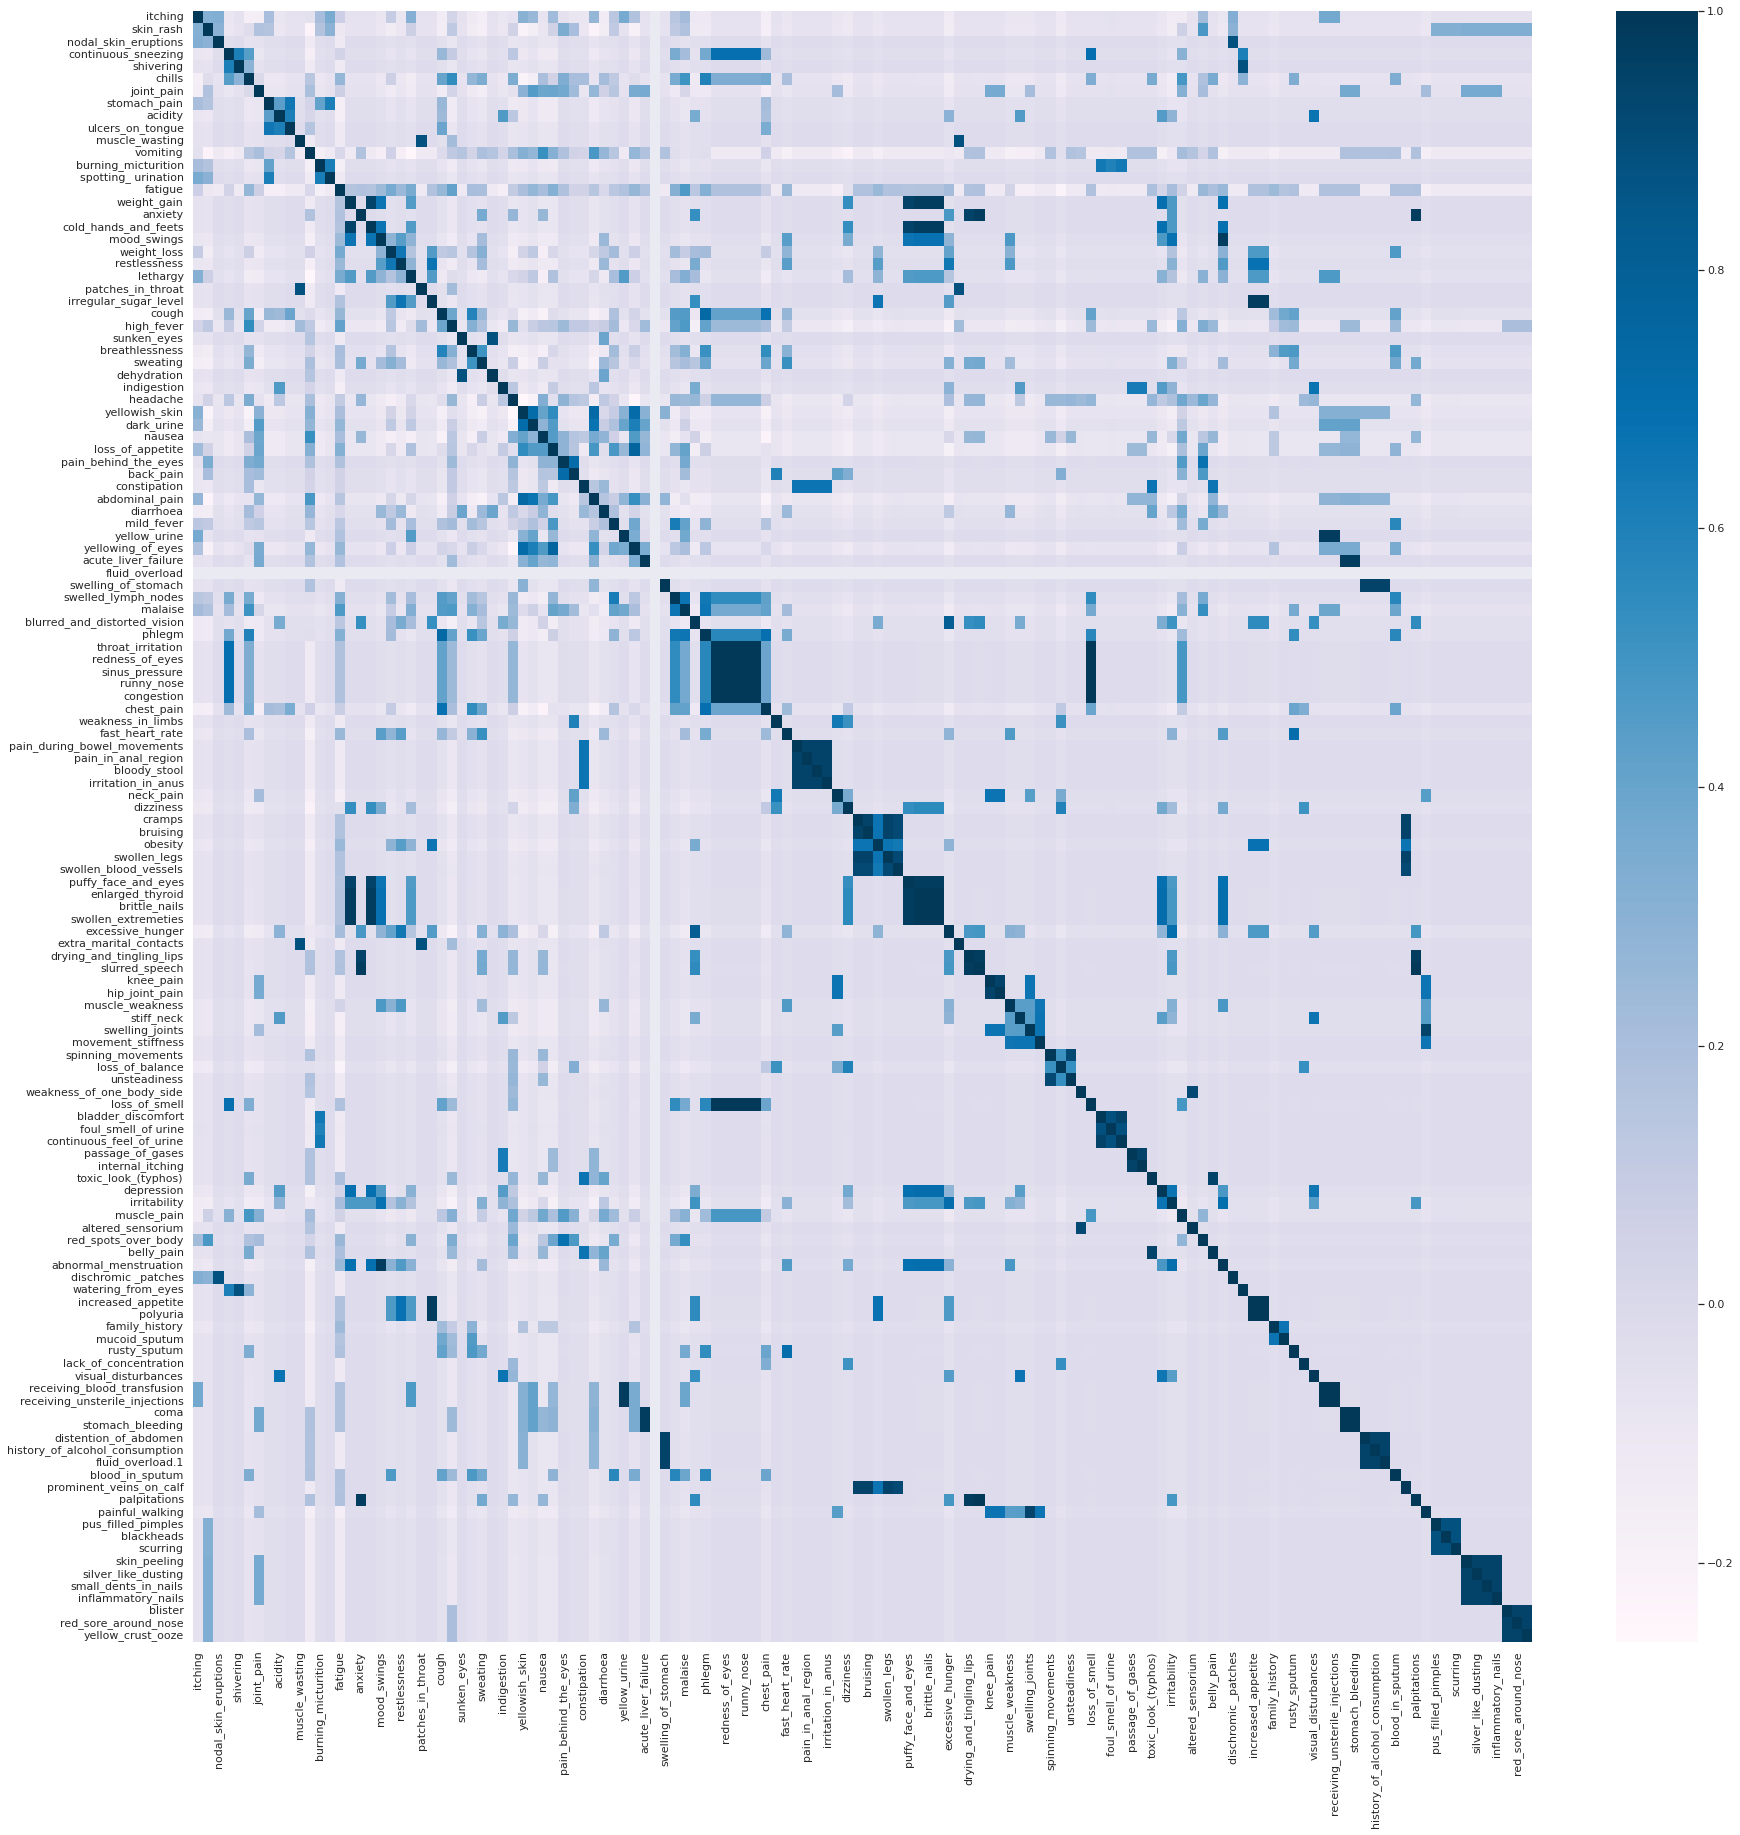

In [70]:
plt.figure(figsize = (30, 30))
sns.heatmap(train_set.corr(), cmap = 'PuBu', annot = False)
plt.show()

#### Dropping feature columns with correlation greater than 0.9

In [71]:
corr_matrix=train_set.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,NaN,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,NaN,NaN,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,NaN,NaN,NaN,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,NaN,NaN,NaN,NaN,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,NaN,NaN,NaN,NaN,NaN,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.946120,-0.023720,-0.023720,-0.023720
inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.023720,-0.023720,-0.023720
blister,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.946120,0.946120
red_sore_around_nose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.946120


In [72]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop,len(to_drop))

train_set=train_set.drop(to_drop, axis=1)
test_set=test_set.drop(to_drop, axis=1)

['redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'slurred_speech', 'loss_of_smell', 'abnormal_menstruation', 'increased_appetite', 'polyuria', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'palpitations'] 17


#### Dropping constant feature columns

In [73]:
# using sklearn variance threshold to find constant features
temp_train=train_set.iloc[:,:-1]

from sklearn.feature_selection import VarianceThreshold


sel = VarianceThreshold(threshold=0.03)
sel.fit(temp_train)


VarianceThreshold(threshold=0.03)

In [74]:
# print the constant features
print(
    len([
        x for x in temp_train.columns
        if x not in temp_train.columns[sel.get_support()]
    ]))

to_drop=[x for x in temp_train.columns if x not in temp_train.columns[sel.get_support()]]
train_set=train_set.drop(to_drop, axis=1)
test_set=test_set.drop(to_drop, axis=1)

65


In [75]:
train_set.head()

,itching,skin_rash,continuous_sneezing,chills,joint_pain,stomach_pain,acidity,vomiting,burning_micturition,fatigue,...,stiff_neck,swelling_joints,loss_of_balance,depression,irritability,muscle_pain,red_spots_over_body,family_history,painful_walking,prognosis
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [76]:
train_set.shape

(4920, 51)

### Label Encoder

In [77]:
encoder = LabelEncoder()
train_set["prognosis"] = encoder.fit_transform(train_set["prognosis"])
test_set["prognosis"] = encoder.transform(test_set["prognosis"])

## Logistic Regression

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

feature_cols = [col for col in train_set.columns if col != 'prognosis']

X_train = train_set[feature_cols]
y_train = train_set['prognosis']
X_test = test_set[feature_cols]
y_test = test_set['prognosis']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression(C=0.2, random_state=42, penalty='l2')
lr.fit(X_train, y_train)

train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print(f"Logistic Train score: {train_score:.4f}")
print(f"Logistic Test score: {test_score:.4f}")


Logistic Train score: 0.9854
Logistic Test score: 0.9805


### Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)

print(f"Decision Tree Train score: {train_score:.4f}")
print(f"Decision Tree Test score: {test_score:.4f}")


Decision Tree Train score: 0.9854
Decision Tree Test score: 0.9795


### Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)

print(f"Random Forest Train score: {train_score:.4f}")
print(f"Random Forest Test score: {test_score:.4f}")


Random Forest Train score: 0.9854
Random Forest Test score: 0.9805


### SVM

In [91]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Evaluate the model
train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test, y_test)

print(f"SVM Train score: {train_score:.4f}")
print(f"SVM Test score: {test_score:.4f}")


SVM Train score: 0.9854
SVM Test score: 0.9805


### Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Initialize and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Evaluate the model
train_score = nb.score(X_train, y_train)
test_score = nb.score(X_test, y_test)

print(f"Naive Bayes Train score: {train_score:.4f}")
print(f"Naive Bayes Test score: {test_score:.4f}")


Naive Bayes Train score: 0.9659
Naive Bayes Test score: 0.9610


## Neural Network

In [93]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Initialize and train the Neural Network model
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), random_state=42)  # 64 units in the first layer, 32 in the second
mlp.fit(X_train, y_train)

# Evaluate the model
train_score = mlp.score(X_train, y_train)
test_score = mlp.score(X_test, y_test)

print(f"Neural Network Train score: {train_score:.4f}")
print(f"Neural Network Test score: {test_score:.4f}")


Neural Network Train score: 0.9854
Neural Network Test score: 0.9805


## Model Accuracy Comparision

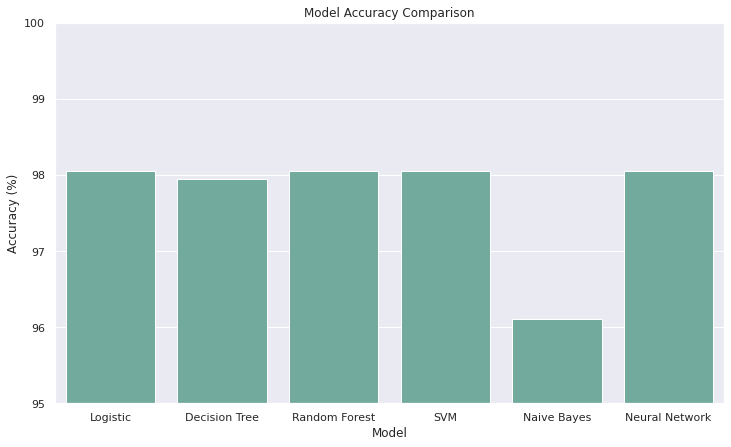

In [96]:
models = {
    'Logistic': LogisticRegression(C=0.2, random_state=42, penalty='l2'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(64, 32), random_state=42)
}

accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    accuracies[name] = test_score * 100  
    
acc_df = pd.DataFrame({
    'Model': accuracies.keys(),
    'Accuracy': accuracies.values()
})

sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_ylim(95, 100) 

sns.barplot(
    x="Model", 
    y="Accuracy", 
    data=acc_df,  
    ci=None, 
    color='#69b3a2',
    orient='v'
)

plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')

plt.show()
